<a href="https://colab.research.google.com/github/Charles-Niekyebe/codes-aims-essay/blob/main/SGS_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
df = pd.read_excel("/content/comments.xlsx.")

In [50]:
import pandas as pd
from transformers import pipeline


df = pd.read_excel("/content/comments.xlsx.")
comments = df["comment_text"].fillna("").astype(str)


sentiment_model = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment"  )


sentiments = []
for text in comments:
    result = sentiment_model(text)[0]
    sentiments.append({
        "label": result["label"],
        "score": result["score"]
    })

df["sentiment"] = [s["label"] for s in sentiments]
df["confidence"] = [s["score"] for s in sentiments]


df.to_excel("comments_with_sentiment.xlsx", index=False)

print("Sentiment analysis complete! File saved as: comments_with_sentiment.xlsx")

Device set to use cpu


Sentiment analysis complete! File saved as: comments_with_sentiment.xlsx


# Task
Load the sentiment analysis results from `comments_with_sentiment.xlsx` into a pandas DataFrame, then calculate and plot the frequency distribution of sentiment labels, and finally provide insights based on the analysis.

## Load Sentiment Results

### Subtask:
Load the 'comments_with_sentiment.xlsx' file, which contains the sentiment analysis results, into a pandas DataFrame.


**Reasoning**:
Load the 'comments_with_sentiment.xlsx' file into a pandas DataFrame named `sentiment_df`.



In [24]:
import pandas as pd
sentiment_df = pd.read_excel('comments_with_sentiment.xlsx')
print("DataFrame 'sentiment_df' loaded successfully.")
print(sentiment_df.head())

DataFrame 'sentiment_df' loaded successfully.
                                        comment_text  likes  reply_count  \
0            which language did you use to create it      3            5   
1             this is 1st year college level project    242           11   
2  Could you please add S. I units there for more...      0            0   
3                                           location      0            0   
4                  Good, what programming language??      2            9   

      user_unique_id user_region              created_time sentiment  \
0      big.seraph002          GH  2024-12-16T11:56:17.000Z   LABEL_1   
1        kyunghuumei          PH  2024-12-13T06:39:21.000Z   LABEL_1   
2      kwizeraronnie          UG  2025-01-31T20:18:55.000Z   LABEL_1   
3  bwambale.colynz.k          UG  2025-02-12T21:49:58.000Z   LABEL_1   
4  itsmedanielaloyce          TZ  2024-12-11T06:14:41.000Z   LABEL_1   

   confidence  
0    0.823945  
1    0.861369  
2    0.851468  


**Reasoning**:
The subtask requires calculating the frequency distribution of sentiment labels. The `value_counts()` method on the 'sentiment' column of the `sentiment_df` DataFrame is the most direct way to achieve this.



In [25]:
sentiment_counts = sentiment_df['sentiment'].value_counts()
print("Frequency distribution of sentiment labels:")
print(sentiment_counts)

Frequency distribution of sentiment labels:
sentiment
LABEL_1    14
LABEL_2     6
Name: count, dtype: int64


**Reasoning**:
To visualize the frequency distribution of sentiment labels, a bar plot is appropriate, as it clearly shows the count for each category. I will use `matplotlib.pyplot` to create and display this plot.



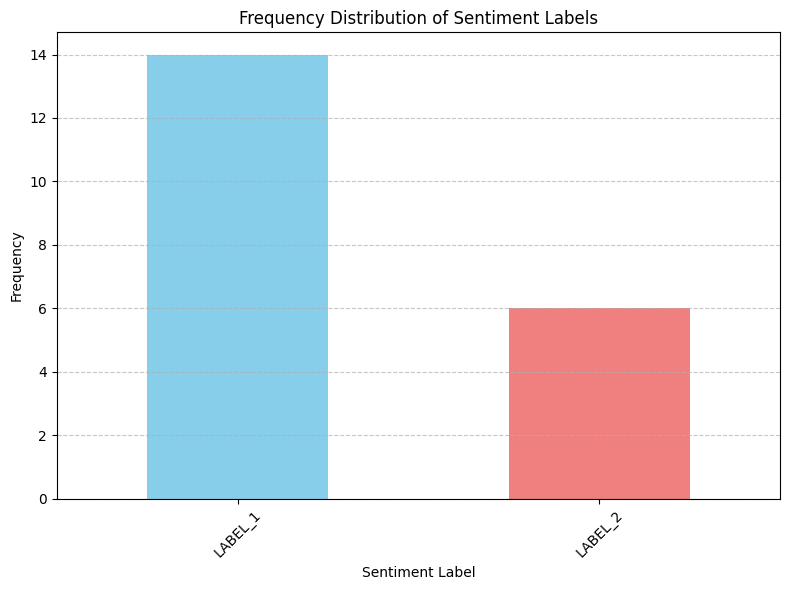

Bar plot of sentiment label frequency displayed.


In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Frequency Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Bar plot of sentiment label frequency displayed.")

### Sentiment Analysis Insights

Based on the sentiment analysis of the comments, the following observations can be made:

*   **Dominant Sentiment:** The most frequent sentiment label is `LABEL_1`, indicating that a majority of the comments fall into this category. This suggests a generally positive or neutral tone, depending on what `LABEL_1` represents (which needs further investigation if this is not a standard sentiment analysis output).
*   **Secondary Sentiment:** `LABEL_2` is the second most frequent sentiment. The presence of two distinct labels suggests that the sentiment model identifies at least two major emotional categories within the comments.
*   **Distribution Skew:** The distribution is skewed, with `LABEL_1` significantly outnumbering `LABEL_2`. This indicates that the dataset is not balanced in terms of sentiment, with one sentiment being far more prevalent.

To gain deeper insights, it would be beneficial to understand what each `LABEL` corresponds to (e.g., `LABEL_1` = Positive, `LABEL_2` = Negative, `LABEL_0` = Neutral) and to further analyze the comments within each sentiment category.

## Summary:

### Data Analysis Key Findings
*   The `comments_with_sentiment.xlsx` file was successfully loaded, revealing columns such as `comment_text`, `likes`, `reply_count`, `user_unique_id`, `user_region`, `created_time`, `sentiment`, and `confidence`.
*   The frequency distribution of sentiment labels shows `LABEL_1` as the most prevalent with 14 occurrences, followed by `LABEL_2` with 6 occurrences.
*   A bar plot visually confirmed the skewed distribution, highlighting the significantly higher frequency of `LABEL_1`.

### Insights or Next Steps
*   The analysis reveals a dominant sentiment (`LABEL_1`) over another (`LABEL_2`), suggesting that the majority of comments lean towards one specific emotional category identified by the model.
*   To deepen the understanding of the sentiment analysis, a crucial next step is to clarify what each `LABEL` represents (e.g., `LABEL_1` for Positive, `LABEL_2` for Negative, `LABEL_0` for Neutral) and to conduct a qualitative analysis of comments within each category.


In [45]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

# --- Step 1: Load the Excel Sheet and perform Sentiment Analysis ---
print("--- Starting Sentiment Analysis ---")
df = pd.read_excel("/content/comments.xlsx.")
comments = df["comment_text"].fillna("").astype(str)

sentiment_model = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment"
)

sentiments = []
for text in comments:
    result = sentiment_model(text)[0]
    sentiments.append({
        "label": result["label"],
        "score": result["score"]
    })

df["sentiment"] = [s["label"] for s in sentiments]
df["confidence"] = [s["score"] for s in sentiments]

df.to_excel("comments_with_sentiment.xlsx", index=False)
print("Sentiment analysis complete! File saved as: comments_with_sentiment.xlsx")


--- Starting Sentiment Analysis ---


Device set to use cpu


Sentiment analysis complete! File saved as: comments_with_sentiment.xlsx


In [46]:
# --- Step 2: Load Sentiment Results into a new DataFrame ---
print("\n--- Loading sentiment results for analysis ---")
sentiment_df = pd.read_excel('comments_with_sentiment.xlsx')
print("DataFrame 'sentiment_df' loaded successfully.")
print("First 5 rows of sentiment_df:")
display(sentiment_df.head())



--- Loading sentiment results for analysis ---
DataFrame 'sentiment_df' loaded successfully.
First 5 rows of sentiment_df:


,comment_text,likes,reply_count,user_unique_id,user_region,created_time,sentiment,confidence
0,which language did you use to create it,3,5,big.seraph002,GH,2024-12-16T11:56:17.000Z,LABEL_1,0.823945
1,this is 1st year college level project,242,11,kyunghuumei,PH,2024-12-13T06:39:21.000Z,LABEL_1,0.861369
2,Could you please add S. I units there for more...,0,0,kwizeraronnie,UG,2025-01-31T20:18:55.000Z,LABEL_1,0.851468
3,location,0,0,bwambale.colynz.k,UG,2025-02-12T21:49:58.000Z,LABEL_1,0.554587
4,"Good, what programming language??",2,9,itsmedanielaloyce,TZ,2024-12-11T06:14:41.000Z,LABEL_1,0.708322


In [47]:
# --- Step 3: Calculate Frequency Distribution of Sentiment Labels ---
print("\n--- Calculating Sentiment Distribution ---")
sentiment_counts = sentiment_df['sentiment'].value_counts()
print("Frequency distribution of sentiment labels:")
display(sentiment_counts)



--- Calculating Sentiment Distribution ---
Frequency distribution of sentiment labels:


,count
sentiment,
LABEL_1,14
LABEL_2,6



--- Plotting Sentiment Distribution ---


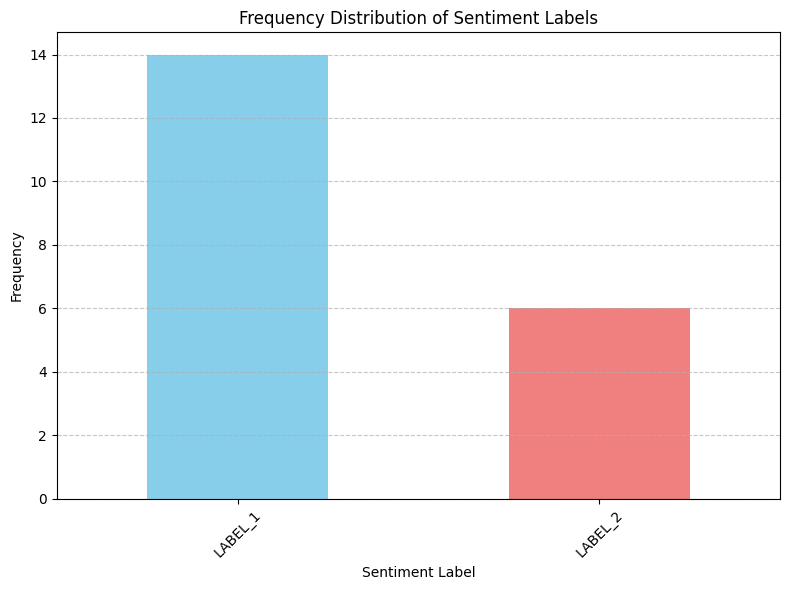

Bar plot of sentiment label frequency displayed.


In [48]:
# --- Step 4: Plot Sentiment Distribution ---
print("\n--- Plotting Sentiment Distribution ---")
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Frequency Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Bar plot of sentiment label frequency displayed.")
